In [23]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM
from astropy import constants as const

In [2]:
os.chdir("/home/benardorci/SimulationData")
os.getcwd()

'/home/benardorci/SimulationData'

In [3]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_100.npy")
CheckingEverythingIsAlright = 117

In [4]:
# MassBins, where:  

#
#                                RETURN MASS BINS !!!!!!!!!!!!!!!!
#

#
#                               NOT USED FOR SINGLE HALO !!!!!!!!!!!!!!!
#

In [5]:
print(CheckingEverythingIsAlright)

117


In [6]:
DMP = np.array(DMP)
DMPCopy = DMP
DMPCopy = np.array(DMPCopy)

Radius = 1
HalfHeight = 5

DMP[:,1] = DMP[:,1] + Radius 
DMP[:,2] = DMP[:,2] + Radius 
DMP[:,3] = DMP[:,3] + HalfHeight

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMPCopy[:,0], DMPCopy[:,1], DMPCopy[:,2], DMPCopy[:,3], DMPCopy[:,4], DMPCopy[:,5], DMPCopy[:,6]) :
    if  x < Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA  
            
        else :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
            
    elif  x > 1050-Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        else :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y < Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif z < HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #CARA             
                  
    elif z > 1050-HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #CARA

In [7]:
print(CheckingEverythingIsAlright)

117


In [8]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [9]:
print(CheckingEverythingIsAlright)

117


In [10]:
MostMassiveHalo = Halos[:,0].max()
IDMostMassiveHalo = 0

for x in Halos[:,0]:
    if x == MostMassiveHalo:
        break
    IDMostMassiveHalo = IDMostMassiveHalo+1

In [36]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

DistanceOfRS0dot3=cosmo.comoving_distance(0.3)
DistanceOfRS0dot3 = DistanceOfRS0dot3.value
print(DistanceOfRS0dot3,"MPC")

1194.3968697152304 MPC


In [42]:
#Halos = np.array(Halos)
#HalosMOVED = Halos
#HalosMOVED = np.array(HalosMOVED)

#HalosMOVED[:,1] = HalosMOVED[:,1] + Radius
#HalosMOVED[:,2] = HalosMOVED[:,2] + Radius           # Usefull???/Should I delete it?
#HalosMOVED[:,3] = HalosMOVED[:,3] + HalfHeight


# New frame of reference (The Halo that was selected).

NewDMPBox[:,1] = NewDMPBox[:,1] - (Halos[IDMostMassiveHalo,1] + Radius)
NewDMPBox[:,2] = NewDMPBox[:,2] - (Halos[IDMostMassiveHalo,2] + Radius)
NewDMPBox[:,3] = NewDMPBox[:,3] - (Halos[IDMostMassiveHalo,3] + HalfHeight) + DistanceOfRS0dot3

# Redshift of the DMP.

DMPBoxRSandA = np.zeros((np.size(NewDMPBox[:,3]),2))
DMPBoxRSandA[:,0] = z_at_value(cosmo.comoving_distance, NewDMPBox[:,3].item()*u.Mpc)
DMPBoxRSandA[:,0] = DMPBoxRSandA[:,0] + (NewDMPBox[:,6].item()/const.c)*(1/(1+DMPBoxRSandA[:,0].item()))

# Angles of the DMP.

DistanceSquared = NewDMPBox[:,1]**2 + NewDMPBox[:,2]**2 
DMPBoxRSandA[:,1] = np.arctan(np.sqrt(DistanceSquared)/NewDMPBox[:,3])

In [11]:
FinalVelocities = []
                                                                         #
                                                                         # CHANGE IF RADIUS IS CHANGED!!!
IndexNumbers = np.array(np.where(2.5<=DMPBoxAandRS[:,0]<=3.5))           # here too c:                                       #

for x in IndexNumbers[:,0] :
    w = int(x)
    Cylinder.append([Box[w,0], Box[w,1], Box[w,2], Box[w,3]])

MBElementVelocity = Halos[IDMostMassiveHalo,6]

Cylinder = np.array(Cylinder)
        
for x in Cylinder[:,3] :
    FinalVelocities.append(x - MBElementVelocity)

In [12]:
print(CheckingEverythingIsAlright)

117


In [13]:
FinalVelocities[1]

-3645.0551171875

In [14]:
np.size(FinalVelocities)

263

In [15]:
print(CheckingEverythingIsAlright)

117


In [16]:
#np.savetxt("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.txt",FinalVelocities,fmt='%s')

In [17]:
print(CheckingEverythingIsAlright)

117


In [18]:
#np.save("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.npy",FinalVelocities)
#np.save("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.npy",FinalVelocities)

In [19]:
print(CheckingEverythingIsAlright)

117


In [20]:
#plt.hist(FinalVelocities, bins=100, histtype='bar', stacked=True)
#plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin#HistogramsDS1000.png")

In [21]:
print(CheckingEverythingIsAlright)

117


(array([ 4.,  3.,  4., 14.,  6., 16., 16., 20., 23., 26., 30., 25., 24.,
        14.,  9., 12.,  6.,  5.,  3.,  3.]),
 array([-4114.93988281, -3682.7942041 , -3250.64852539, -2818.50284668,
        -2386.35716797, -1954.21148926, -1522.06581055, -1089.92013184,
         -657.77445312,  -225.62877441,   206.5169043 ,   638.66258301,
         1070.80826172,  1502.95394043,  1935.09961914,  2367.24529785,
         2799.39097656,  3231.53665527,  3663.68233398,  4095.8280127 ,
         4527.97369141]),
 <a list of 20 Patch objects>)

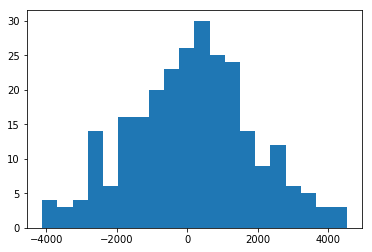

In [22]:
plt.hist(FinalVelocities, bins=20) #density=True
#plt.savefig("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.png")
#plt.savefig("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.png")